# JAX: A High-Performance Python Library

Jax is a python library developed and used by Google Research that can run numpy-like code fast using its compiler and can run on a GPU with very few changes to your code.  It also can automatically compute the gradient of functions.

This article on the [JAX Ecosystem](https://moocaholic.medium.com/jax-a13e83f49897) by Grigory Sapunov is a nice overview of jax and what it is being used for.

The [JAX reference documentation](https://jax.readthedocs.io/en/latest/index.html) will be useful, too.

## Installing

Commands I used to install jax in my anaconda distribution are the following:

      pip install --upgrade jax
      pip install --upgrade "jax[cuda111]" -f https://storage.googleapis.com/jax-release.html

      export PATH=$PATH:/usr/local/cuda/11.1/bin
      
This is on my CS account.  I believe the steps are similar to how I installed it on my Ubuntu laptop.

## From Numpy to Jax

Many `numpy` functions work just the same in `jax`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import jax.numpy as jnp
import jax

In [2]:
jax.config.update('jax_platform_name', 'cpu')
jax.config.update('jax_enable_x64', True)

In [3]:
n = 5
X = np.random.normal(size=(n, n))
X

array([[-1.29543644,  0.25974875,  1.35558001,  0.53382436, -1.01600467],
       [ 0.95613028, -0.10621018, -0.59275365,  0.68216816,  0.55383135],
       [-0.18256088,  0.52788555, -0.29693287, -0.37574512, -1.20004592],
       [-0.90185171,  0.42917951,  0.61914371,  1.64087527,  0.25370498],
       [ 1.71216377, -0.15740839,  0.21433572,  0.05719913, -0.15089114]])

In [4]:
type(X)

numpy.ndarray

In [5]:
key = jax.random.PRNGKey(0)
Xj = jax.random.normal(key, shape=(n, n), dtype=jnp.float64)
Xj

DeviceArray([[-1.94963384e-01, -1.22714659e+00, -9.17790208e-01,
               1.45208933e-01,  1.81519776e-03],
             [-7.49586842e-01, -8.02633400e-01,  1.22429120e-01,
              -1.75889952e-01,  1.05807414e+00],
             [-2.44926166e-01, -7.76449818e-01,  4.07351856e-01,
               5.34739321e-01, -1.35932526e+00],
             [-2.18004277e+00, -2.71964285e-01,  1.36571531e+00,
               3.09982098e-01,  3.47224140e-01],
             [-3.68758371e-01,  2.74834294e-01,  1.21677907e+00,
              -2.98193408e-01, -1.75672736e+00]], dtype=float64)

In [6]:
Xj = jnp.array(X)
Xj

DeviceArray([[-1.29543644,  0.25974875,  1.35558001,  0.53382436,
              -1.01600467],
             [ 0.95613028, -0.10621018, -0.59275365,  0.68216816,
               0.55383135],
             [-0.18256088,  0.52788555, -0.29693287, -0.37574512,
              -1.20004592],
             [-0.90185171,  0.42917951,  0.61914371,  1.64087527,
               0.25370498],
             [ 1.71216377, -0.15740839,  0.21433572,  0.05719913,
              -0.15089114]], dtype=float64)

In [ ]:
Xj

In [7]:
type(Xj)

jaxlib.xla_extension.DeviceArray

In [8]:
X.dtype, Xj.dtype

(dtype('float64'), dtype('float64'))

In [11]:
Xj.device().device_kind

'cpu'

In [12]:
X @ X.T

array([[ 4.90045607, -2.26825622,  0.98976773,  2.73724299, -1.78449636],
       [-2.26825622,  2.04890517, -0.97555518, -0.01500801,  1.4821729 ],
       [ 0.98976773, -0.97555518,  1.98145537, -0.71365212, -0.29972706],
       [ 2.73724299, -0.01500801, -0.71365212,  4.13770836, -1.42339486],
       [-1.78449636,  1.4821729 , -0.29972706, -1.42339486,  3.02826186]])

In [13]:
Xj @ Xj.T

DeviceArray([[ 4.90045607, -2.26825622,  0.98976773,  2.73724299,
              -1.78449636],
             [-2.26825622,  2.04890517, -0.97555518, -0.01500801,
               1.4821729 ],
             [ 0.98976773, -0.97555518,  1.98145537, -0.71365212,
              -0.29972706],
             [ 2.73724299, -0.01500801, -0.71365212,  4.13770836,
              -1.42339486],
             [-1.78449636,  1.4821729 , -0.29972706, -1.42339486,
               3.02826186]], dtype=float64)

Is jax any faster at this matrix multiplication?

In [14]:
%timeit X @ X.T

1.92 µs ± 12.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [15]:
%timeit Xj @ Xj.T

216 µs ± 6.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Disappointed?

In [16]:
n = 6000
X = np.random.normal(size=(n, n)) # .astype('float32')
Xj = jnp.array(X)  #jax.random.normal(key, shape=(n, n), dtype=jnp.float64)

In [17]:
X.dtype, Xj.dtype

(dtype('float64'), dtype('float64'))

In [18]:
def mult(A):
    return A @ A.T

In [19]:
print('numpy', X.dtype)
%timeit mult(X)
print('jax.numpy', Xj.dtype)
%timeit mult(Xj)
print('jax.numpy', Xj.dtype)
%timeit mult(Xj).block_until_ready()

numpy float64
971 ms ± 37.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy float64
3.21 s ± 9.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy float64
3.21 s ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
X = X.astype(np.float32)
Xj = Xj.astype(jnp.float32)

print('numpy', X.dtype)
%timeit mult(X)
print('jax.numpy', Xj.dtype)
%timeit mult(Xj)

numpy float32
491 ms ± 27.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy float32
904 ms ± 4.63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
list(range(0, 100, 10))

## Compiling

In [21]:
mult_jit = jax.jit(mult)
mult_jit(Xj).block_until_ready()  # run once for the compilation to be 

DeviceArray([[6068.0693   ,  -19.010832 ,   66.541466 , ...,
                 6.4127645,   61.56075  ,   40.39839  ],
             [ -19.010832 , 6064.512    ,  -69.94424  , ...,
                44.6725   ,  -59.44353  ,  -48.32373  ],
             [  66.541466 ,  -69.94424  , 6159.434    , ...,
               -96.41253  ,  102.95906  ,  -88.3955   ],
             ...,
             [   6.4127645,   44.6725   ,  -96.41253  , ...,
              5999.6562   ,  -48.007923 ,   30.044577 ],
             [  61.56075  ,  -59.44353  ,  102.95906  , ...,
               -48.007923 , 6047.8857   ,  -50.01706  ],
             [  40.39839  ,  -48.32373  ,  -88.3955   , ...,
                30.044577 ,  -50.01706  , 6088.027    ]], dtype=float32)

In [22]:
n = 6000
X = np.random.normal(size=(n, n)) # .astype('float32')
Xj = jnp.array(X)  #jax.random.normal(key, shape=(n, n), dtype=jnp.float64)

In [23]:
X.dtype, Xj.dtype

(dtype('float64'), dtype('float64'))

In [24]:
print('numpy', X.dtype)
%timeit mult(X)
print('jax.numpy', Xj.dtype)
%timeit mult(Xj)
print('jax.numpy jit', Xj.dtype)
%timeit mult_jit(Xj)

numpy float64
905 ms ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy float64
3.21 s ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy jit float64
3.12 s ± 8.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
X = X.astype(np.float32)
Xj = Xj.astype(jnp.float32)

print('numpy', X.dtype)
%timeit mult(X)
print('jax.numpy', Xj.dtype)
%timeit mult(Xj)
print('jax.numpy jit', Xj.dtype)
%timeit mult_jit(Xj)

numpy float32
510 ms ± 25.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy float32
911 ms ± 5.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy jit float32
866 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
import time

result = []

for n in range(0, 10000, 1000):
    X = np.random.normal(size=(n, n)).astype(np.float64)
    Xj = jnp.array(X).astype(jnp.float64)
    
    start_time = time.time()
    mult(X)
    np_time64 = time.time() - start_time

    start_time = time.time()
    mult(Xj)
    jnp_time64 = time.time() - start_time

    start_time = time.time()
    mult_jit(Xj)
    jnp_jit_time64 = time.time() - start_time
        
    X = X.astype(np.float32)
    Xj = Xj.astype(jnp.float32)
    
    start_time = time.time()
    mult(X)
    np_time32 = time.time() - start_time
    
    start_time = time.time()
    mult(Xj)
    jnp_time32 = time.time() - start_time

    start_time = time.time()
    mult_jit(Xj)
    jnp_jit_time32 = time.time() - start_time

    result.append([n, np_time64, jnp_time64, jnp_jit_time64, np_time32, jnp_time32, jnp_jit_time32])

<IPython.core.display.Javascript object>


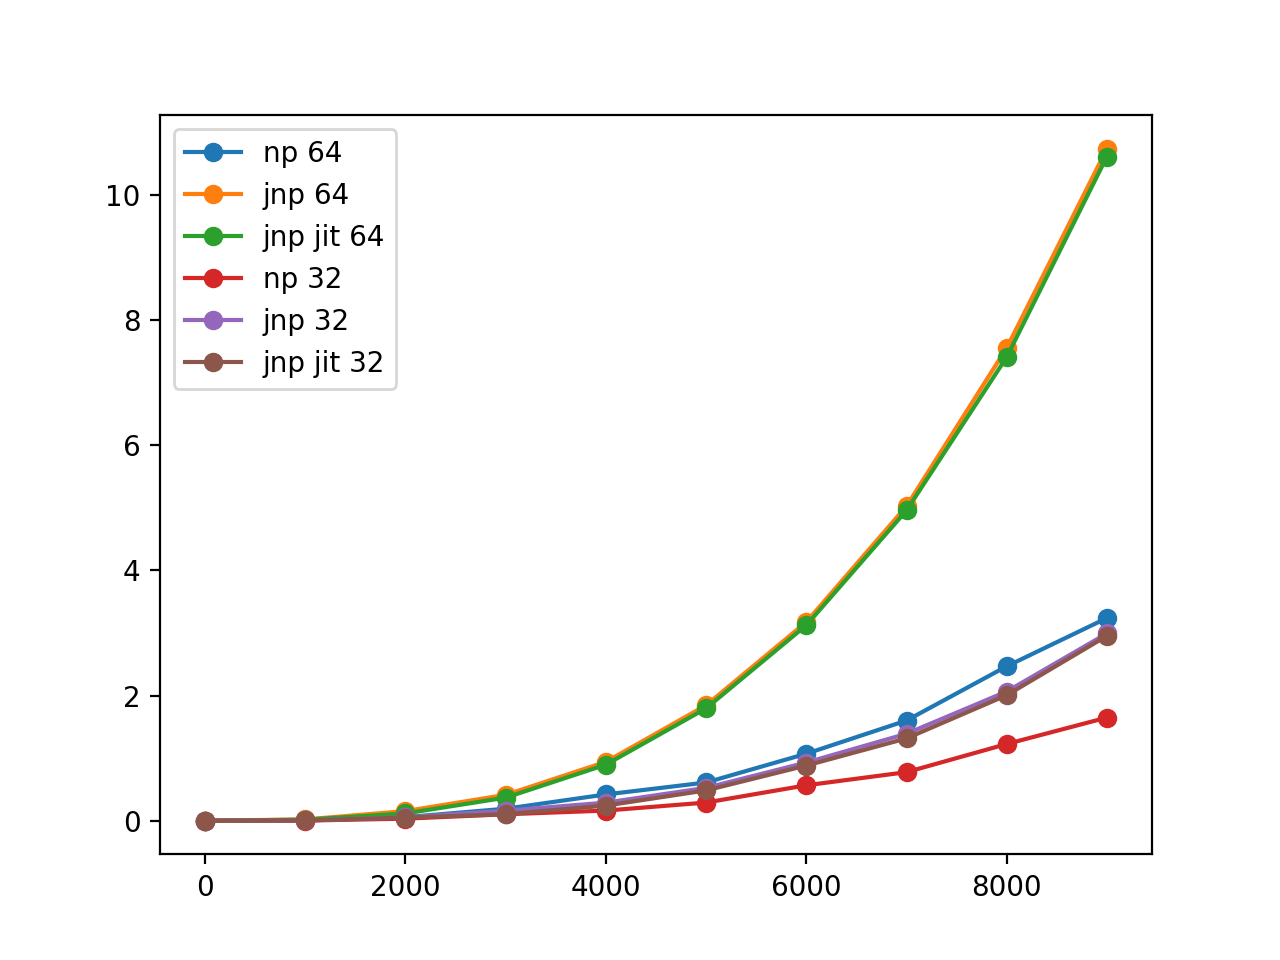

In [33]:
result = np.array(result)
plt.figure()
plt.plot(result[:, 0], result[:, 1:], 'o-', label=('np 64', 'jnp 64', 'jnp jit 64',
                                                   'np 32', 'jnp 32', 'jnp jit 32'))
plt.legend();

## JAX: The Sharp Bits

This article on [The Sharp Bits](https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html) will be helpful when you run into issues with Jax.

## Running on  a GPU

For the following config.update to have an effect, we just restart the kernel and jump down to this cell to start executing.

In [34]:
!cat gpu_machines

rock
paper
scissors
anchovy
barracuda
blowfish
bonito
brill
bullhead
char
cod
dorado
eel
flounder
grouper
halibut
herring
mackerel
marlin
perch
pollock
sardine
shark
sole
swordfish
tarpon
turbot
tuna
earth
jupiter
mars
mercury
neptune
saturn
uranus
venus


In [ ]:
!gpustatus -f gpu_machines

In [1]:
!nvidia-smi

Wed Sep 22 10:11:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 470.63.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA TITAN V      Off  | 00000000:02:00.0 Off |                  N/A |
| 32%   47C    P8    28W / 250W |      5MiB / 12066MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import time

import jax.numpy as jnp
import jax

jax.config.update('jax_platform_name', 'gpu')

In [3]:
n = 6000
X = np.random.normal(size=(n, n)).astype(np.float64)
Xj = jnp.array(X).astype(jnp.float64)
    

/s/parsons/e/fac/anderson/anaconda3/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:5940: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "astype")


In [4]:
n = 6000
X = np.random.normal(size=(n, n)).astype(np.float32)
Xj = jnp.array(X).astype(jnp.float32)
    

In [5]:
Xj.device().device_kind

'NVIDIA TITAN V'

In [6]:
def mult(A):
    return A @ A.T

mult_jit = jax.jit(mult)
mult_jit(Xj).block_until_ready()  # run once for the compilation to be 

DeviceArray([[ 5.8156650e+03, -1.2609706e+02,  1.1048616e+02, ...,
               6.8356949e+01,  1.0665167e+02,  1.1415671e+02],
             [-1.2609706e+02,  6.2259824e+03,  7.3656799e+01, ...,
               8.9955849e+01, -3.6590458e+01, -1.6784436e+02],
             [ 1.1048616e+02,  7.3656799e+01,  6.0835903e+03, ...,
              -1.0840456e+01,  4.9797703e+01,  1.3083968e+01],
             ...,
             [ 6.8356949e+01,  8.9955849e+01, -1.0840456e+01, ...,
               6.1039160e+03,  3.9022362e+00,  4.8400295e+01],
             [ 1.0665167e+02, -3.6590458e+01,  4.9797703e+01, ...,
               3.9022362e+00,  5.9432041e+03, -6.8865181e+01],
             [ 1.1415671e+02, -1.6784436e+02,  1.3083968e+01, ...,
               4.8400295e+01, -6.8865181e+01,  6.0021768e+03]],            dtype=float32)

In [7]:
result = []

for n in range(0, 10000, 1000):
    X = np.random.normal(size=(n, n)).astype(np.float32)
    Xj = jnp.array(X).astype(jnp.float32)

    start_time = time.time()
    mult(X)
    np_time32 = time.time() - start_time
    
    mult(Xj).block_until_ready()
    
    start_time = time.time()
    mult(Xj).block_until_ready()
    jnp_time32 = time.time() - start_time

    mult_jit(Xj).block_until_ready()
    
    start_time = time.time()
    mult_jit(Xj).block_until_ready()
    jnp_jit_time32 = time.time() - start_time

    
    result.append([n, np_time32, jnp_time32, jnp_jit_time32])

<IPython.core.display.Javascript object>


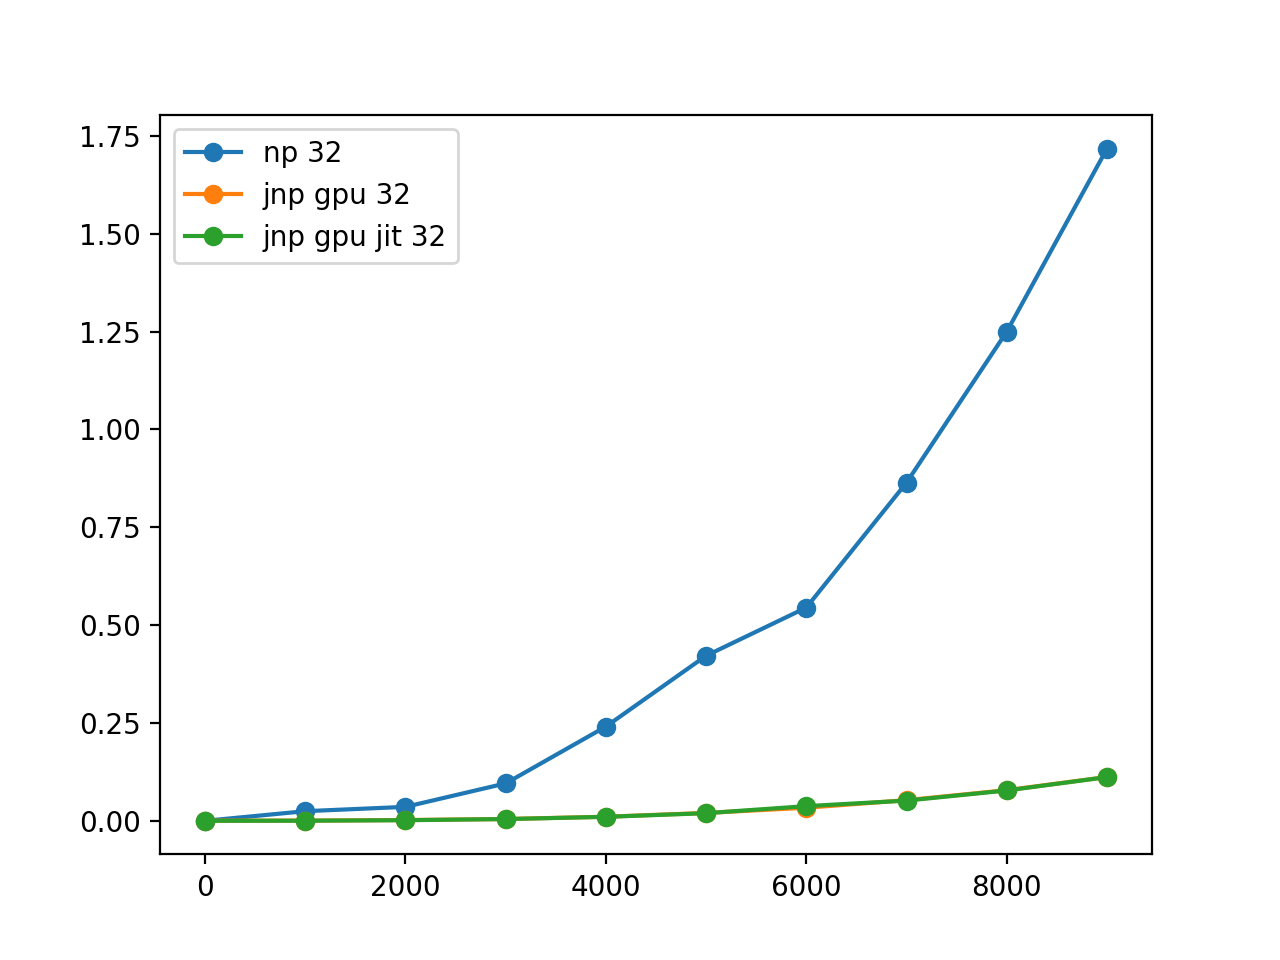

In [8]:
result = np.array(result)
plt.figure()
plt.plot(result[:, 0], result[:, 1:], 'o-', label=('np 32', 'jnp gpu 32', 'jnp gpu jit 32'))
plt.legend();

## How about some Neural Network code?

Again, restart kernel and jump to this code cell to start.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import time

import jax
import jax.numpy as jnp

jax.config.update('jax_platform_name', 'cpu')

In [2]:
def init_weights():
    return[np.random.uniform(-1.0, 1.0, size=(4, 10)) / np.sqrt(4),
           np.random.uniform(-1.0, 1.0, size=(11, 1)) / np.sqrt(11)]

def nnet(Ws, X):
    Z = np.tanh(X @ Ws[0][1:, :] + Ws[0][0:1, :])
    Y = Z @ Ws[1][1:, :] + Ws[1][0:1, :]
    return Z, Y

def mse(Ws, X, T):
    _, Y = nnet(Ws, X)
    return np.mean((Y - T)**2)

def mse_grad_def(Ws, X, T):
    Z, Y = nnet(Ws, X)
    n_samples, n_outputs = T.shape
    D = -(T - Y) / (n_samples * n_outputs)
    gradients = [np.vstack((np.sum(D, axis=0), Z.T @ D))]
    D = D @ Ws[1][1:, :].T * (1 - Z ** 2)
    gradients = [np.vstack((np.sum(D, axis=0), X.T @ D))] + gradients
    return gradients

In [3]:
X = np.arange(60000).reshape((20000, 3)).astype(np.float32)
T = X[:, 0:1] / 100  #  * X[:, 1:2] / 10000

def train(X, T, Ws, n_updates, learning_rate, gf):
    for update_i in range(n_updates):
        gradients = gf(Ws, X, T)
        for W, grad in zip(Ws, gradients):
            W[:] = W - learning_rate * grad  # W -= learning_rate * grad did not work.
    # print(np.hstack((T, nnet(Ws, X)[1])))

Ws = init_weights()
start = time.time()
train(X, T, Ws, 1000, 0.01, mse_grad_def)
print(f'def took {time.time() - start} seconds')

def took 4.181565999984741 seconds


<IPython.core.display.Javascript object>


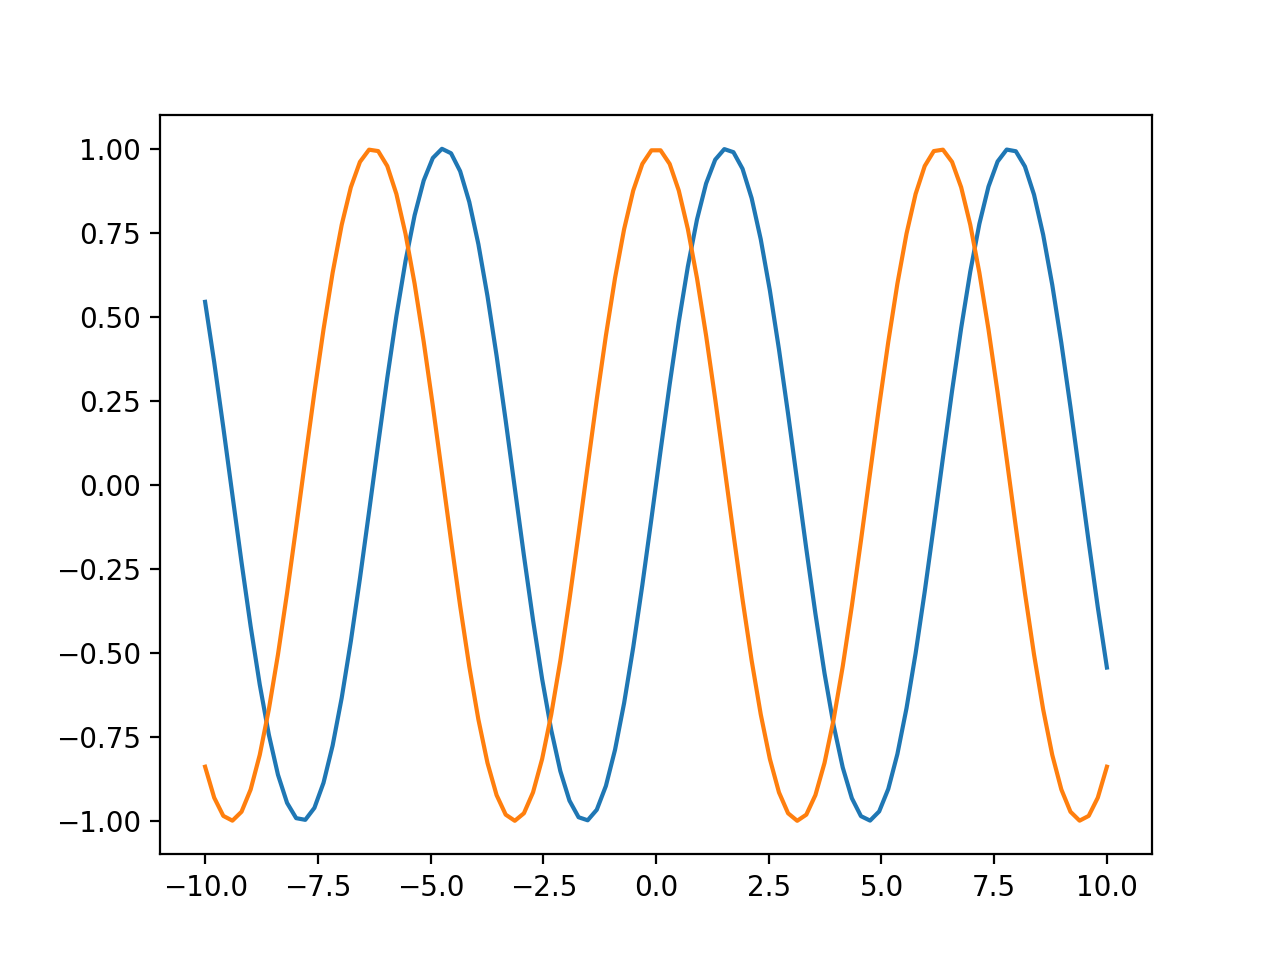

In [7]:
def f(x):
    return jnp.sin(x)

xs = jnp.linspace(-10, 10, 100)
plt.plot(xs, f(xs))

df = jax.grad(f)
plt.plot(xs, [df(x) for x in xs])

In [8]:
def jnnet(Ws, X):
    Z = jnp.tanh(X @ Ws[0][1:, :] + Ws[0][0:1, :])
    Y = Z @ Ws[1][1:, :] + Ws[1][0:1, :]
    return Z, Y

def jmse(Ws, X, T):
    _, Y = jnnet(Ws, X)
    return jnp.mean((Y - T)**2)

jmse(Ws, X, T)
mse_grad = jax.grad(jmse)
mse_grad_jit = jax.jit(jax.grad(jmse))
mse_grad_jit(Ws, X, T);

In [9]:
n_epochs = 100

Ws = init_weights()
start = time.time()
train(X, T, Ws, n_epochs, 0.01, mse_grad_def)
np_time = time.time() - start
print(f'numpy took {np_time} seconds')

Ws = init_weights()
start = time.time()
train(X, T, Ws, n_epochs, 0.01, mse_grad)
print(f'jax auto took {time.time() - start} seconds')

Ws = init_weights()
start = time.time()
train(X, T, Ws, n_epochs, 0.01, mse_grad_jit)
compiled_time = time.time() - start
print(f'jax compiled auto: took {compiled_time} seconds')

numpy took 0.26909875869750977 seconds
jax auto took 2.1819372177124023 seconds
jax compiled auto: took 0.06324028968811035 seconds


In [10]:
print(f'jax compiled autograd is {np_time / compiled_time:.2f} times faster than numpy')

jax compiled autograd is 4.26 times faster than numpy


Now, let's run on the gpu! Again, restart the kernel and jump to this cell.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import time

import jax
import jax.numpy as jnp

jax.config.update('jax_platform_name', 'gpu')

In [2]:
def init_weights():
    return[np.random.uniform(-1.0, 1.0, size=(4, 10)).astype(np.float32) / np.sqrt(4),
           np.random.uniform(-1.0, 1.0, size=(11, 100)).astype(np.float32) / np.sqrt(11)]

def nnet(Ws, X):
    Z = np.tanh(X @ Ws[0][1:, :] + Ws[0][0:1, :])
    Y = Z @ Ws[1][1:, :] + Ws[1][0:1, :]
    return Z, Y

def mse(Ws, X, T):
    _, Y = nnet(Ws, X)
    return np.mean((Y - T)**2)

def mse_grad_def(Ws, X, T):
    Z, Y = nnet(Ws, X)
    n_samples, n_outputs = T.shape
    D = -(T - Y) / (n_samples * n_outputs)
    gradients = [np.vstack((np.sum(D, axis=0), Z.T @ D))]
    D = D @ Ws[1][1:, :].T * (1 - Z ** 2)
    gradients = [np.vstack((np.sum(D, axis=0), X.T @ D))] + gradients
    return gradients

In [10]:
X = np.arange(60000*2).reshape((20000*2, 3)).astype(np.float32) 
T = X[:, 0:1] / 100  #  * X[:, 1:2] / 10000

# import jax.ops as jops

def train(X, T, Ws, n_updates, learning_rate, gf):
    for _ in range(n_updates):
        gradients = gf(Ws, X, T)
        Ws = [W - learning_rate * g for (W, g) in zip(Ws, gradients)]

Ws = init_weights()
start = time.time()
train(X, T, Ws, 1000, 0.01, mse_grad_def)
print(f'def took {time.time() - start} seconds')

def took 16.71676993370056 seconds


In [11]:
Xj = jnp.array(X).astype(jnp.float32)
Tj = jnp.array(T).astype(jnp.float32)
Wsj = [jnp.array(W) for W in Ws]

def jnnet(Ws, X):
    Z = jnp.tanh(X @ Ws[0][1:, :] + Ws[0][0:1, :])
    Y = Z @ Ws[1][1:, :] + Ws[1][0:1, :]
    return Z, Y

def jmse(Ws, X, T):
    _, Y = jnnet(Ws, X)
    return jnp.mean((Y - T)**2)

jmse(Wsj, Xj, Tj)
mse_grad = jax.grad(jmse)
mse_grad_jit = jax.jit(jax.grad(jmse))
mse_grad_jit(Wsj, Xj, Tj);

In [12]:
n_epochs = 100

Ws = init_weights()
start = time.time()
train(X, T, Ws, n_epochs, 0.01, mse_grad_def)
np_time = time.time() - start
print(f'numpy took {np_time} seconds')

Ws = init_weights()
Wsj = [jnp.array(W) for W in Ws]
start = time.time()
train(Xj, Tj, Wsj, n_epochs, 0.01, mse_grad)
print(f'jax auto took {time.time() - start} seconds')

Ws = init_weights()
Wsj = [jnp.array(W) for W in Ws]
start = time.time()
train(Xj, Tj, Wsj, n_epochs, 0.01, mse_grad_jit)
compiled_time = time.time() - start
print(f'jax compiled auto: took {compiled_time} seconds')

numpy took 1.7244069576263428 seconds
jax auto took 2.2943711280822754 seconds
jax compiled auto: took 0.04033708572387695 seconds


In [13]:
print(f'jax compiled autograd is {np_time / compiled_time:.2f} times faster than numpy')

jax compiled autograd is 42.75 times faster than numpy


In [8]:
jnnet(Wsj, Xj)[0].device().device_kind

'NVIDIA TITAN V'